<a href="https://colab.research.google.com/github/Sam-1806/Drug_pred/blob/main/drug_review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
import os
import glob

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
shortcut_path = '/content/drive/MyDrive/data'

In [ ]:
dtype_dict = {'drugName': str, 'condition': str, 'review': str}
train_df = pd.read_csv('/content/drive/MyDrive/data/train.csv', dtype=dtype_dict)

In [ ]:
print(train_df.head())

   uniqueID                  drugName                     condition  \
0  206461.0                 Valsartan  Left Ventricular Dysfunction   
1   95260.0                Guanfacine                          ADHD   
2   92703.0                    Lybrel                 Birth Control   
3  138000.0                Ortho Evra                 Birth Control   
4   35696.0  Buprenorphine / naloxone             Opiate Dependence   

                                              review  
0  "It has no side effect, I take it in combinati...  
1  "My son is halfway through his fourth week of ...  
2  "I used to take another oral contraceptive, wh...  
3  "This is my first time using any form of birth...  
4  "Suboxone has completely turned my life around...  


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import nltk

# Check for missing values in the 'Review' column
train_df['review'].isnull().sum()


159305

In [ ]:
# Fill missing values with empty string
train_df['review'].fillna('', inplace=True)

# function for text preprocessing
def preprocess_text(text):
    # Remove non-alphanumeric characters and convert to lowercase
    text = re.sub(r'[^a-zA-Z0-9]', ' ', str(text).lower())

    # Remove stopwords and perform stemming
    stop_words = set(stopwords.words('english'))
    ps = PorterStemmer()
    words = [ps.stem(word) for word in text.split() if word not in stop_words]

    return ' '.join(words)

# Apply preprocessing to the 'Review' column
train_df['Processed_Review'] = train_df['review'].apply(preprocess_text)

# Display the first few rows of the preprocessed data
train_df[['review', 'Processed_Review', 'drugName']].head()


,review,Processed_Review,drugName
0,"""It has no side effect, I take it in combinati...",side effect take combin bystol 5 mg fish oil,Valsartan
1,"""My son is halfway through his fourth week of ...",son halfway fourth week intuniv becam concern ...,Guanfacine
2,"""I used to take another oral contraceptive, wh...",use take anoth oral contracept 21 pill cycl ha...,Lybrel
3,"""This is my first time using any form of birth...",first time use form birth control 039 glad wen...,Ortho Evra
4,"""Suboxone has completely turned my life around...",suboxon complet turn life around feel healthie...,Buprenorphine / naloxone


In [ ]:
# Preprocessing
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re

# Download NLTK resources
import nltk
nltk.download('stopwords')

# Define a function for text preprocessing
def preprocess_text(text):
    # Remove non-alphanumeric characters and convert to lowercase
    text = re.sub(r'[^a-zA-Z0-9]', ' ', text.lower())

    # Remove stopwords and perform stemming
    stop_words = set(stopwords.words('english'))
    ps = PorterStemmer()
    words = [ps.stem(word) for word in text.split() if word not in stop_words]

    return ' '.join(words)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Drop rows with missing values
train_df = train_df.dropna(subset=['review'])

# Tokenize and preprocess the text data
reviews = train_df['review'].values
labels = train_df['drugName'].values

# Encode the target variable
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(reviews, encoded_labels, test_size=0.2, random_state=42)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

distribution of drug names in the dataset.

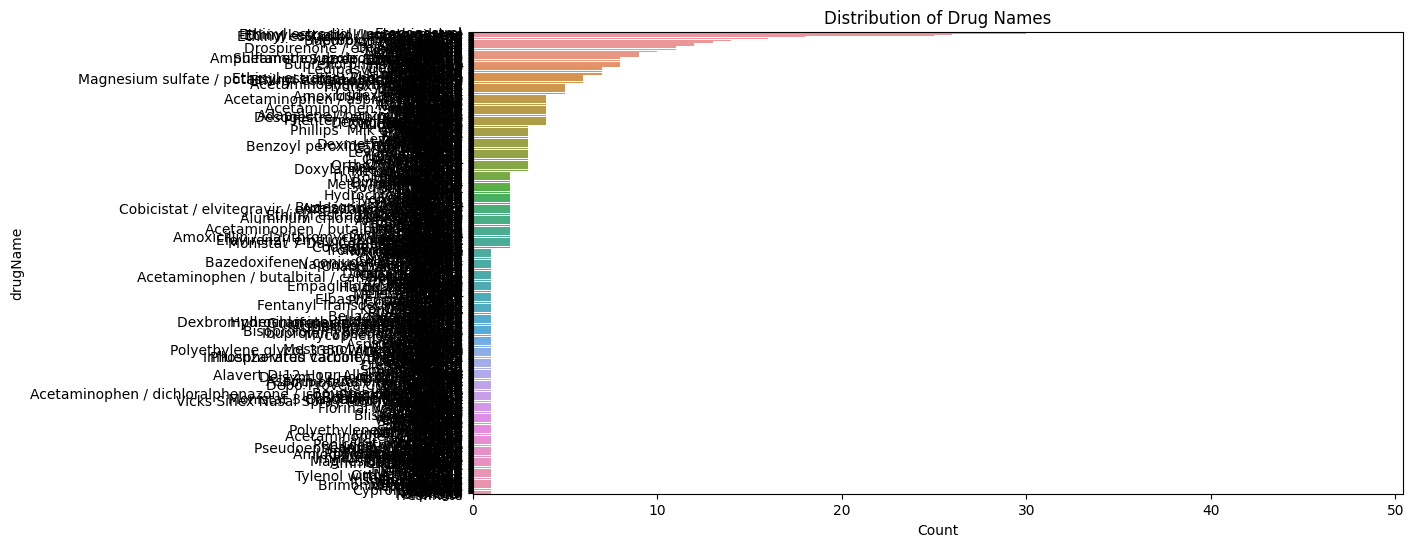

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(y='drugName', data=train_df, order=train_df['drugName'].value_counts().index)
plt.title('Distribution of Drug Names')
plt.xlabel('Count')
plt.show()

distribution of conditions for which drugs are prescribed.

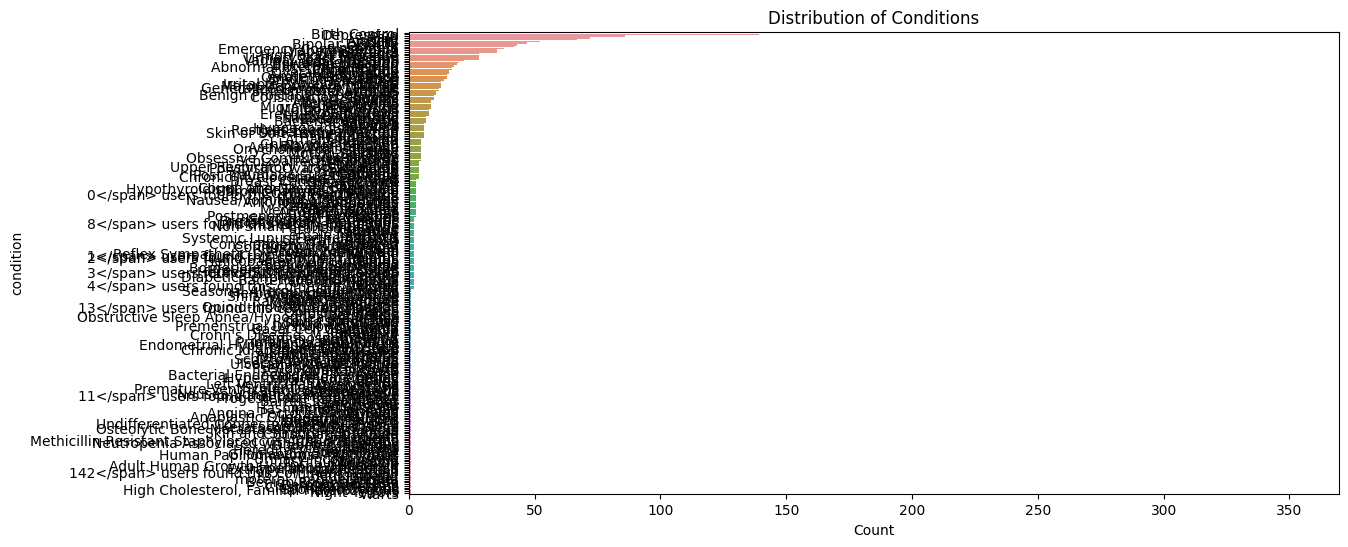

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(y='condition', data=train_df, order=train_df['condition'].value_counts().index)
plt.title('Distribution of Conditions')
plt.xlabel('Count')
plt.show()

distribution of review lengths

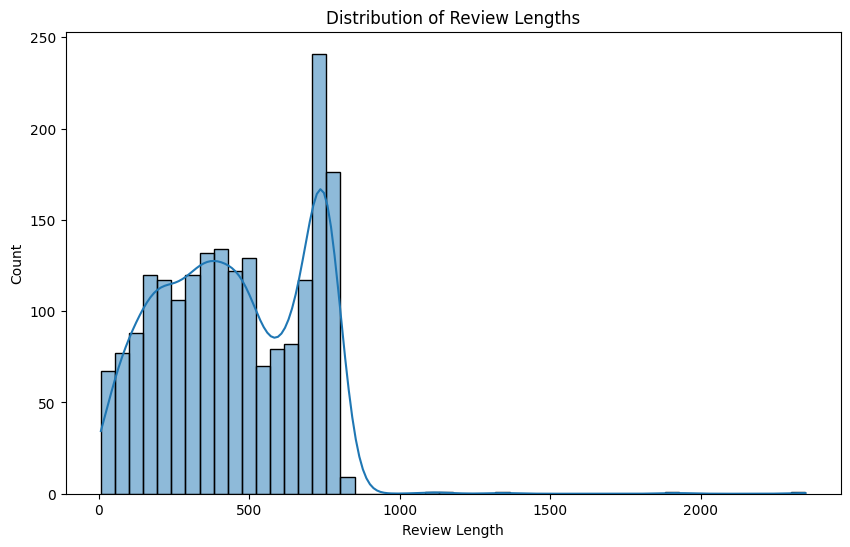

In [ ]:
train_df['review_length'] = train_df['review'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(train_df['review_length'], bins=50, kde=True)
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Count')
plt.show()

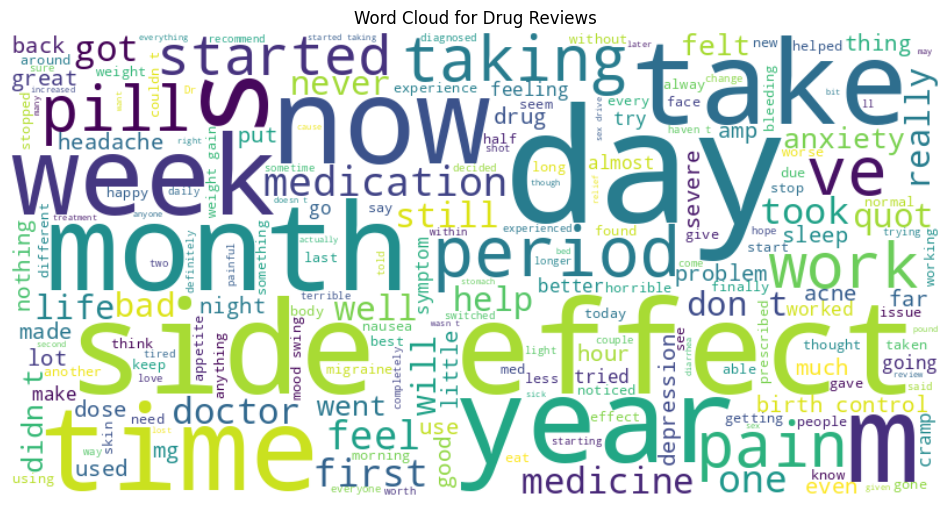

In [ ]:
from wordcloud import WordCloud

# Generate a word cloud for drug reviews
reviews_text = ' '.join(train_df['review'].values)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(reviews_text)

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Drug Reviews')
plt.show()


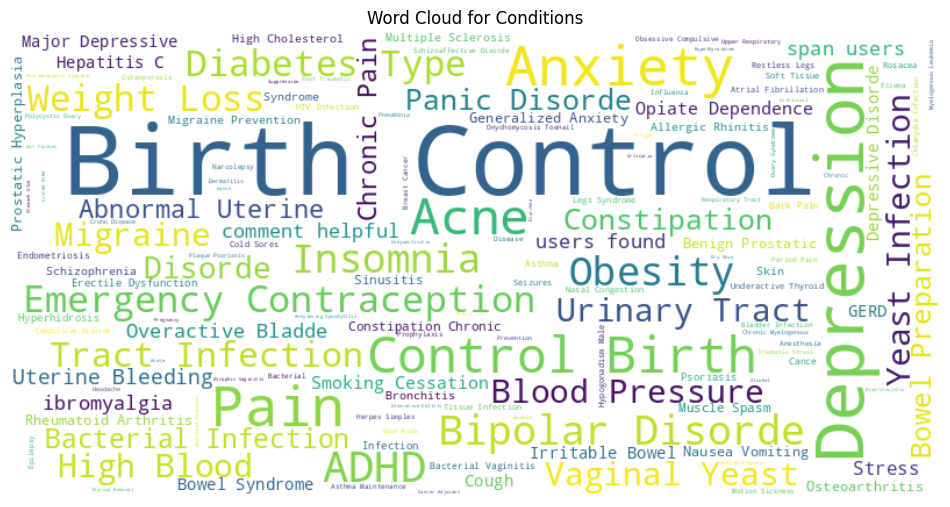

In [ ]:
# Generate a word cloud for conditions
conditions_text = ' '.join(train_df['condition'].dropna().values)
wordcloud_conditions = WordCloud(width=800, height=400, background_color='white').generate(conditions_text)

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud_conditions, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Conditions')
plt.show()

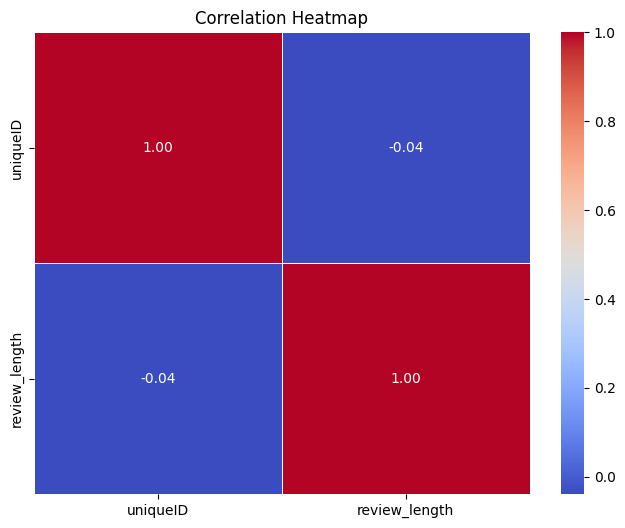

In [ ]:
# heatmap to explore correlations
correlation_matrix = train_df[['uniqueID', 'review_length']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Machine Learning Model

In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification
from torch.utils.data import DataLoader, TensorDataset, random_split
from torch.nn import CrossEntropyLoss
import torch

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(label_encoder.classes_))

# Tokenize and prepare input tensors
tokenized_data = tokenizer(list(X_train), truncation=True, padding=True, return_tensors='pt', max_length=256)
train_dataset = TensorDataset(tokenized_data['input_ids'], tokenized_data['attention_mask'], torch.tensor(y_train))

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
batch_size = 6
epochs = 5
learning_rate = 2e-5

# Prepare DataLoader
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

In [ ]:
# Set up optimizer and loss function
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)
criterion = CrossEntropyLoss()

In [ ]:
for epoch in range(epochs):
    for batch in train_dataloader:
        input_ids, attention_mask, labels = batch
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()


In [ ]:
model.save_pretrained('bert_model')

Evaluation

In [ ]:
# Tokenize and prepare input tensors for the test set
tokenized_test_data = tokenizer(list(X_val), truncation=True, padding=True, return_tensors='pt', max_length=256)
test_dataset = TensorDataset(tokenized_test_data['input_ids'], tokenized_test_data['attention_mask'])

# Define DataLoader for test set
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
# Tokenize and prepare input tensors for validation set
tokenized_val_data = tokenizer(list(X_val), truncation=True, padding=True, return_tensors='pt', max_length=256)
val_dataset = TensorDataset(tokenized_val_data['input_ids'], tokenized_val_data['attention_mask'], torch.tensor(y_val))


In [ ]:
# Prepare DataLoader for validation set
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
true_labels = []
predicted_labels = []


In [ ]:
model.eval()
val_loss = 0.0
val_corrects = 0
true_labels = []  # Initialize an empty list for true labels
predicted_labels = []  # Initialize an empty list for predicted labels

with torch.no_grad():
    for batch in val_dataloader:
        input_ids, attention_mask, labels = batch
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        val_loss += loss.item()

        # Assuming labels are not one-hot encoded
        val_corrects += (torch.argmax(outputs.logits, axis=1) == labels).sum().item()

        predictions = torch.argmax(outputs.logits, axis=1).cpu().numpy()

        # Extend true and predicted labels lists
        true_labels.extend(labels.cpu().numpy())
        predicted_labels.extend(predictions)

# Calculate validation loss and accuracy
avg_val_loss = val_loss / len(val_dataloader.dataset)
val_accuracy = val_corrects / len(val_dataloader.dataset)
accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels, average='weighted')
recall = recall_score(true_labels, predicted_labels, average='weighted')
f1 = f1_score(true_labels, predicted_labels, average='weighted')

print(f'Validation Loss: {avg_val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}')
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

#print("\nConfusion Matrix:")
#print(conf_matrix)


Validation Loss: 0.9974, Validation Accuracy: 0.0627
Accuracy: 0.0627
Precision: 0.0255
Recall: 0.0627
F1 Score: 0.0230


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
model.eval()
with torch.no_grad():
    for batch, unique_id_batch in zip(test_dataloader, test_unique_ids):
        input_ids, attention_mask = batch
        outputs = model(input_ids, attention_mask=attention_mask)
        predictions = torch.argmax(outputs.logits, axis=1).cpu().numpy()

        # Extend lists with unique IDs and predicted labels
        unique_ids.extend(unique_id_batch)
        predicted_labels.extend(predictions)

# DataFrame with unique IDs and predicted labels
predictions_df = pd.DataFrame({'UniqueID': unique_ids, 'PredictedLabel': predicted_labels})

# Save the predictions to a CSV file
predictions_df.to_csv('predictions.csv', index=False)